In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display
from random import uniform
%matplotlib inline

In [3]:
# load a file 
file_path = "/Users/sanchit/Documents/Projects/datasets/audio_data/samples/up.wav"

audio_data, sampling_rate = librosa.load(file_path)

print(f"shape of the audio file: {audio_data.shape} and sampling rate: {sampling_rate}")

shape of the audio file: (22050,) and sampling rate: 22050


In [4]:
# play the audio file
ipd.Audio(audio_data, rate=sampling_rate)

In [5]:
class Audio_augmentation:
    """audio augmentation"""
    
    def __init__(self, audio_data, sampling_rate):
        self.audio_data = audio_data
        self.sampling_rate = sampling_rate 
        self.audio_len = len(audio_data)
        
        # fixed parameters for computing mel spectrogram 
        # parameters for computing short-time FT 
        self.n_fft = 2048 
        self.hop_length = int(self.n_fft / 4)
        
    def _compute_mel_spectrogram(self, data):
        """compute mel spectrogram of the signal"""
        mel_spectrogram = librosa.feature.melspectrogram(data, sr=self.sampling_rate, 
                                                         n_fft=self.n_fft, hop_length=self.hop_length)
        
        print(f"shaoe of the spectrogram: {mel_spectrogram.shape}")
        return librosa.power_to_db(abs(mel_spectrogram))
        
    def plot_signals(self, augment_data, title=""):
        """plot original and augmented signals along with their spectrogram"""
        fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,8))
        x = np.arange(0, self.audio_len)
        
        ax1.plot(x, self.audio_data)
        ax1.set_title('origianl audio waveform')
        ax1.set_xlabel('samples')
        ax1.set_ylabel('amplitude')
        
        assert self.audio_len == len(augment_data)
        
        ax2.plot(np.arange(0, len(self.audio_data)), augment_data)
        ax2.set_title(title)
        ax2.set_xlabel('samples')
        ax2.set_ylabel('amplitude')
        
        # compute and plot the mel-spectrogram
        log_mel_spect = self._compute_mel_spectrogram(augment_data)
        librosa.display.specshow(log_mel_spect, sr=self.sampling_rate, 
                                 hop_length=self.hop_length, x_axis='time', y_axis='mel', 
                                 ax=ax3) 
        
        ax3.set_title("Mel Spectrogram")        
        plt.show()
        
    def play_signal(self, data):
        """play audio data"""
        return ipd.Audio(data, rate=self.sampling_rate)
        
    def speeding_up_down(self):
        """change speed of the audio signal (either fast or low), i.e., time stretching"""
        # rate between (0,1) will slow down the signal, i.e., it will add more samples
        rate = uniform(0.5, 0.9)
        data_down = librosa.effects.time_stretch(self.audio_data, rate)
        
        # rate > 1 will make the signal go fast, i.e., it will remove samples
        rate = uniform(1.1, 1.5)
        data_up = librosa.effects.time_stretch(self.audio_data, rate)
    
        # time streching either add or remove samples, therefore, maintaing the 
        # same size/length of augmented data is important 
        if len(data_down) > self.audio_len:
            # just truncate the last samples 
            data_down = data_down[:self.audio_len] 
            
        if len(data_up) < self.audio_len:
            # otherwise pad the array with zeros at the end 
            data_up = np.pad(data_up, (0, self.audio_len-len(data_up)), mode="constant")
        return (data_down, data_up)
    
    def add_random_noise(self):
        """add white Gaussion noise to the data"""
        wgn = np.random.randn(self.audio_len)
        return self.audio_data + 0.005*wgn 
    
    def shift_data(self, factor=0.2):
        """roll (circular shift) the data on both directions"""
        len_roll = int(self.audio_len*factor)
        return np.roll(self.audio_data, len_roll), np.roll(self.audio_data, -len_roll)
    
    def change_pitch(self):
        """ change the pitch (frequencies) of the signal """
        steps = np.random.uniform(low=-4, high=4)
        return librosa.effects.pitch_shift(self.audio_data, self.sampling_rate, n_steps=steps)
    
    def change_loudness(self):
        """change the loudness (amplitude) of the signal"""
        factor = np.random.uniform(low=-4, high=4) 
        return self.audio_data*factor

In [6]:
audio_aug = Audio_augmentation(audio_data, sampling_rate)

shaoe of the spectrogram: (128, 44)


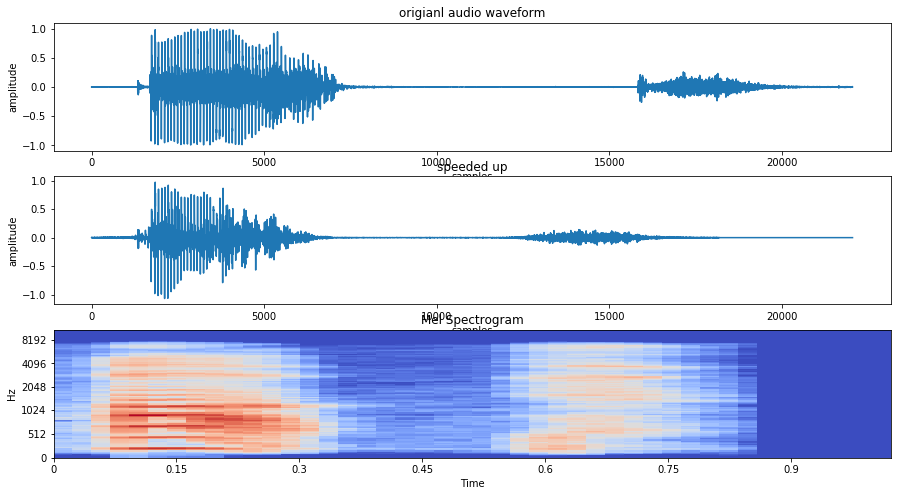

In [7]:
audio_down, audio_up = audio_aug.speeding_up_down()

audio_aug.plot_signals(audio_up, title="speeded up")
audio_aug.play_signal(audio_up)

shaoe of the spectrogram: (128, 44)


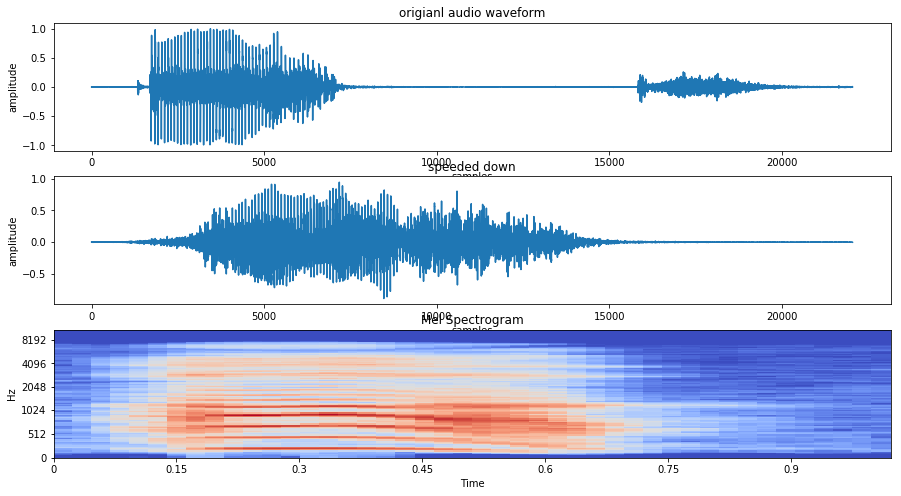

In [8]:
audio_aug.plot_signals(audio_down, title="speeded down")
audio_aug.play_signal(audio_down)

shaoe of the spectrogram: (128, 44)


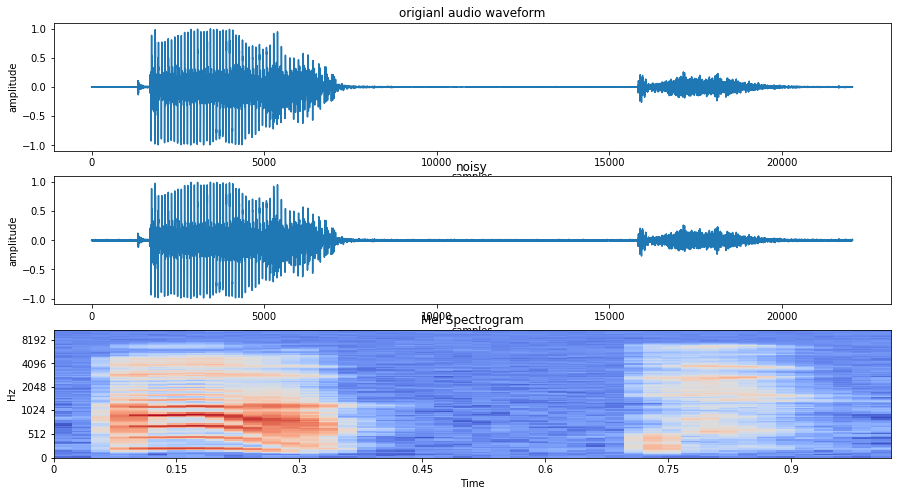

In [9]:
audio_noise = audio_aug.add_random_noise()

audio_aug.plot_signals(audio_noise, title="noisy")
audio_aug.play_signal(audio_noise)

shaoe of the spectrogram: (128, 44)


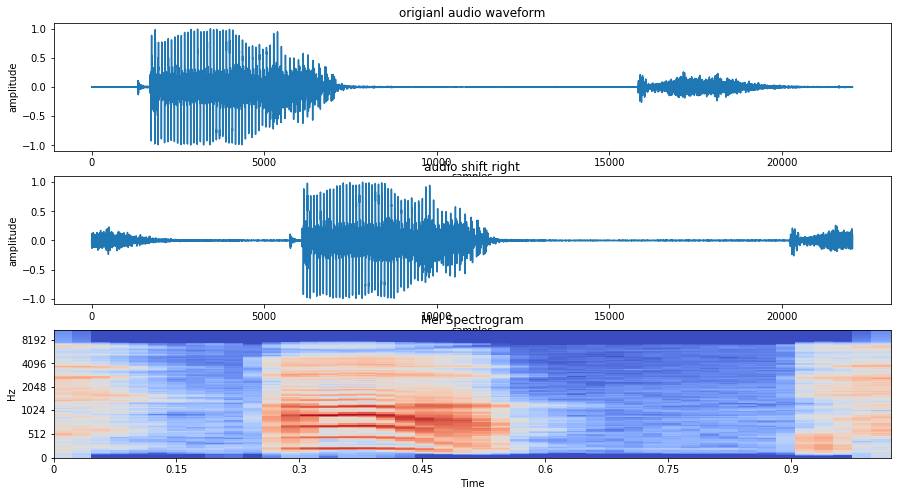

In [10]:
audio_shift_right, audio_shift_left = audio_aug.shift_data()

audio_aug.plot_signals(audio_shift_right, title="audio shift right")
audio_aug.play_signal(audio_shift_right)

shaoe of the spectrogram: (128, 44)


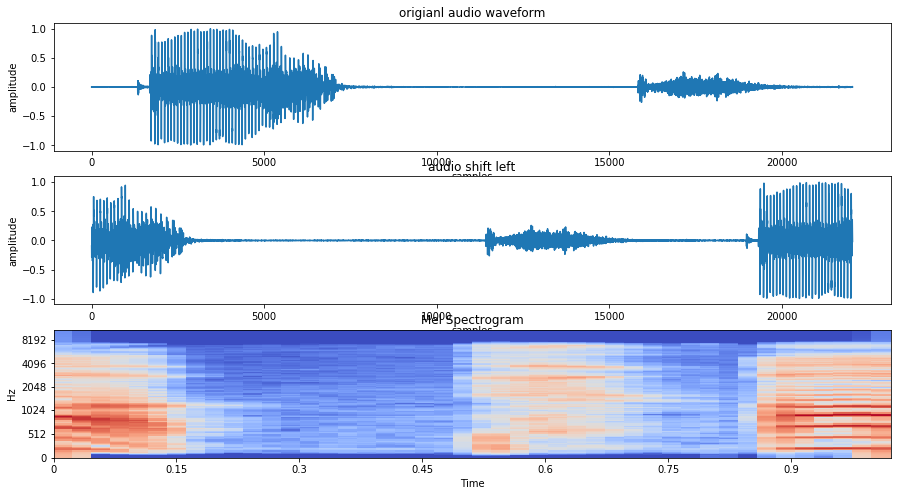

In [11]:
audio_aug.plot_signals(audio_shift_left, title="audio shift left")
audio_aug.play_signal(audio_shift_left)

shaoe of the spectrogram: (128, 44)


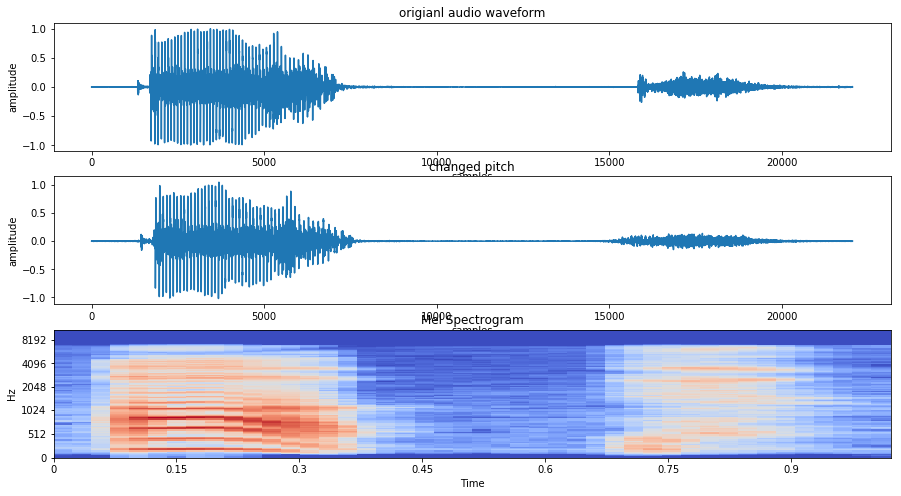

In [12]:
audio_pitch = audio_aug.change_pitch()

audio_aug.plot_signals(audio_pitch, title="changed pitch")
audio_aug.play_signal(audio_pitch) 

shaoe of the spectrogram: (128, 44)


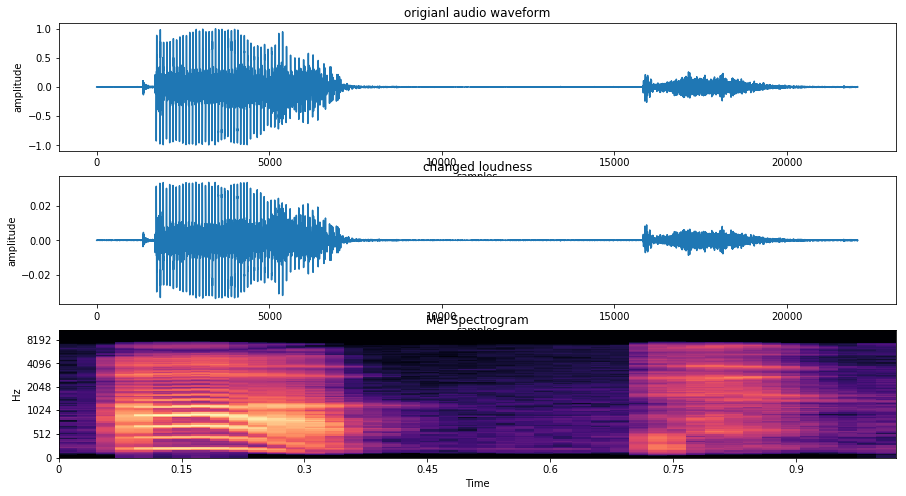

In [13]:
audio_loud = audio_aug.change_loudness()

audio_aug.plot_signals(audio_loud, title="changed loudness")
audio_aug.play_signal(audio_loud) 